# **Credit Card Fraud Detection**

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

try:
    import xgboost as xgb
    has_xgb = True
except ImportError:
    has_xgb = False

# **Loading The Dataset**

In [2]:
credit = pd.read_csv (r"C:\Users\bbuser\Desktop\NumPy\DataScience-Brain-Bytes\DataScience-Brain-Bytes\Team_members\from_deena\data\creditcard.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Step 1: Exploratory Data Analysis (EDA)**

## **Basic info**

In [3]:
print("Shape:", credit.shape)

Shape: (284807, 31)


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## **Class balance**

In [6]:
counts = credit['Class'].value_counts()
counts

Class
0    284315
1       492
Name: count, dtype: int64

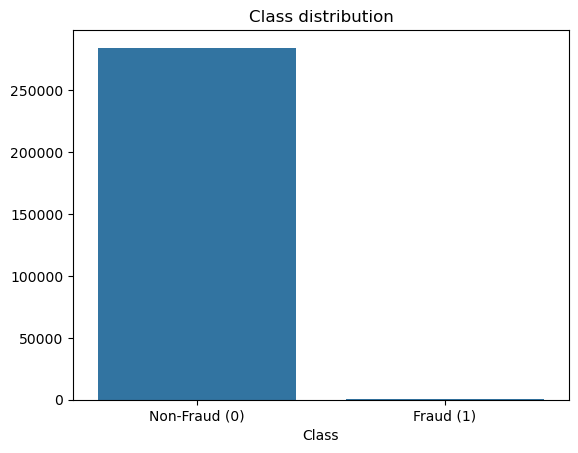

In [7]:
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0,1], ["Non-Fraud (0)", "Fraud (1)"])
plt.title("Class distribution")
plt.show()

## **Fraction fraud**

In [8]:
print("Fraud fraction:", counts[1] / counts.sum())

Fraud fraction: 0.001727485630620034


## **Distribution of Amount by class**

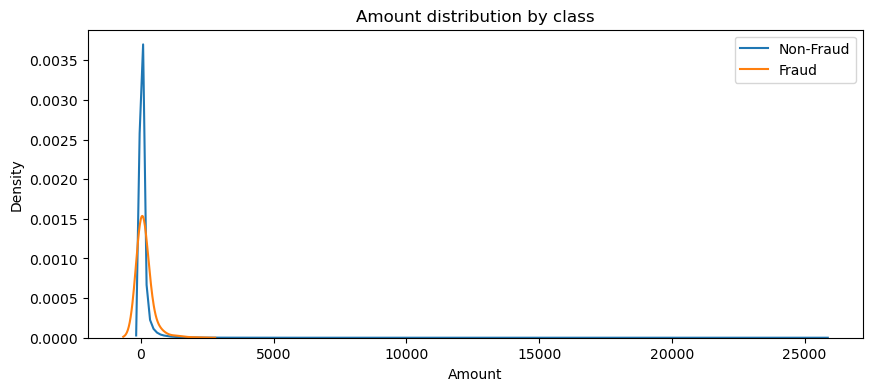

In [9]:
plt.figure(figsize=(10,4))
sns.kdeplot(credit[credit['Class']==0]['Amount'], label='Non-Fraud', bw_adjust=3)
sns.kdeplot(credit[credit['Class']==1]['Amount'], label='Fraud', bw_adjust=3)
plt.legend(); plt.title("Amount distribution by class"); plt.show()

## **Correlation heatmap**

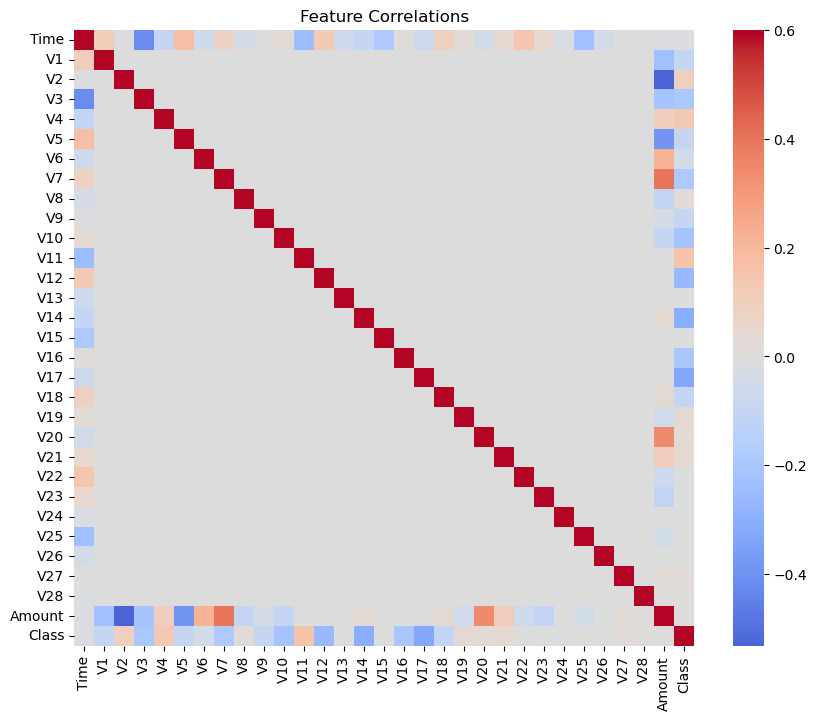

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(credit.corr(), cmap='coolwarm', center=0, vmax=0.6)
plt.title("Feature Correlations")
plt.show()

# **Step 2: Data Preprocessing**

## **Features and target**

In [11]:
X = credit.drop(columns=['Class'])
y = credit['Class']

## **Scale 'Amount' (and optionally 'Time')**

In [12]:
scaler = StandardScaler()
X[['Amount']] = scaler.fit_transform(X[['Amount']])

## **Train/test split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.mean(), y_test.mean())

(227845, 30) (56962, 30) 0.001729245759178389 0.0017204452090867595


# **Step 3: Baseline Models**

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}
if has_xgb:
    models['XGBoost'] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

results = []

for name, model in models.items():
    t0 = time.time()
    model.fit(X_train, y_train)
    t = time.time() - t0

    # predicted probs (for ROC/PR). If model doesn't provide proba, use decision_function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:,1]
    else:
        y_scores = model.decision_function(X_test)

    y_pred = (y_scores >= 0.5).astype(int)  # default threshold

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    auc_roc = auc(*roc_curve(y_test, y_scores)[:2])
    avg_prec = average_precision_score(y_test, y_scores)  # PR-AUC

    results.append({
        "Model": name,
        "Train Time (s)": round(t,2),
        "Accuracy": acc,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1": report['1']['f1-score'],
        "ROC-AUC": auc_roc,
        "PR-AUC": avg_prec
    })
    print(name)
    print(classification_report(y_test, y_pred, zero_division=0))

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962

RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      

In [ ]:
# Create a results DataFrame
res_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)
res_df

# **Step 4: Model Evaluation**

## **Confusion matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Example for RandomForest
model = models['RandomForest']
if hasattr(model, "predict_proba"):
    scores = model.predict_proba(X_test)[:,1]
else:
    scores = model.decision_function(X_test)
preds = (scores >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm, display_labels=['Non-Fraud','Fraud']).plot()
plt.show()

## **Precision, Recall, and F1 Score**

In [ ]:
# Precision-Recall
prec, rec, _ = precision_recall_curve(y_test, scores)
plt.plot(rec, prec, label=f"RF (AP={average_precision_score(y_test, scores):.3f})")
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall'); plt.legend(); plt.show()

## **ROC-AUC Score**

In [ ]:
# ROC
fpr, tpr, _ = roc_curve(y_test, scores)
plt.plot(fpr, tpr, label=f"RF (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC'); plt.legend(); plt.show()

# **Step 5: Model Improvements**

# **Handling class imbalance**

## **Resampling techniques (searching required)**

In [ ]:
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)

# Example pipeline: SMOTE + RandomForest
pipeline = imbpipeline(steps=[('smote', SMOTE(random_state=42)), 
                              ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])
pipeline.fit(X_train, y_train)

# Evaluate
y_scores = pipeline.predict_proba(X_test)[:,1]
y_pred = (y_scores >= 0.5).astype(int)

print(classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC:", auc(*roc_curve(y_test, y_scores)[:2]))
print("PR-AUC:", average_precision_score(y_test, y_scores))

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10]}
pipe = imbpipeline(steps=[('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier(random_state=42))])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
g = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=cv, n_jobs=-1)
g.fit(X_train, y_train)
print("Best:", g.best_params_, "Best AP:", g.best_score_)

## **Decision Threshold Adjustment**

In [ ]:
from sklearn.metrics import precision_recall_curve

model = pipeline  # or any fitted model with predict_proba
y_scores = model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Suppose we want recall >= 0.8, pick threshold with highest precision at recall>=0.8
target_recall = 0.8
idxs = np.where(recalls >= target_recall)[0]
if len(idxs) > 0:
    best_idx = idxs[np.argmax(precisions[idxs])]
    best_thresh = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    print("Selected threshold:", best_thresh, "precision:", precisions[best_idx], "recall:", recalls[best_idx])
    y_pred_adj = (y_scores >= best_thresh).astype(int)
    print(classification_report(y_test, y_pred_adj, zero_division=0))
else:
    print("No threshold yields recall >= ", target_recall)

## **Re-train and re-evaluate models**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10]}
pipe = imbpipeline(steps=[('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier(random_state=42))])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
g = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=cv, n_jobs=-1)
g.fit(X_train, y_train)
print("Best:", g.best_params_, "Best AP:", g.best_score_)

# **Step 6: Summary & Insights**

## **Final comparison & reporting**

In [ ]:
# Example assemble table
final_results = []
for name, model in [('RF_baseline', models['RandomForest']), ('RF_smote', pipeline)]:
    if hasattr(model,'predict_proba'):
        scores = model.predict_proba(X_test)[:,1]
    else:
        scores = model.decision_function(X_test)
    y_pred = (scores >= 0.5).astype(int)
    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": auc(*roc_curve(y_test, scores)[:2]),
        "PR-AUC": average_precision_score(y_test, scores)
    })
pd.DataFrame(final_results).sort_values('PR-AUC', ascending=False)

## **Error analysis (inspect misclassified transactions)**

In [ ]:
# For a chosen model
model = pipeline  # the chosen best model
scores = model.predict_proba(X_test)[:,1]
preds = (scores >= best_thresh).astype(int)  # or 0.5

fn_idx = np.where((y_test==1) & (preds==0))[0]  # missed frauds
fp_idx = np.where((y_test==0) & (preds==1))[0]  # false alarms

# Inspect a few examples
print("Missed fraud examples (index in test set):", fn_idx[:5])
print("False positives examples:", fp_idx[:5])

# Show original features for a few
X_test_reset = X_test.reset_index(drop=True) if isinstance(X_test, pd.DataFrame) else pd.DataFrame(X_test)
display(X_test_reset.loc[fn_idx[:5]])

## **Summary & Practical recommendations**

* Metric to focus on: PR-AUC and recall (sensitivity) for fraud class. Use Precision-Recall curves more than ROC when positives are rare.
* Quick wins:
* Use class_weight='balanced' for quick improvements.
* Use SMOTE (oversampling) or combined SMOTE+undersampling pipelines for better recall.
* Tune decision threshold based on acceptable precision/recall tradeoff.
* Stronger models: tree ensembles (Random Forest, XGBoost) often do well; tune with cross-validation.
* Costs: Decide business cost tradeoff (cost per false negative vs false positive) and use cost-sensitive learning or threshold tuned to minimize cost.
* Production: If deployed, monitor model drift — fraud patterns change.